In [198]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
import warnings
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
df.shape

(200, 5)

In [202]:
# check for null values & dtypes

In [203]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [204]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [205]:
# visualize & check if Gender plays a factor in spending score

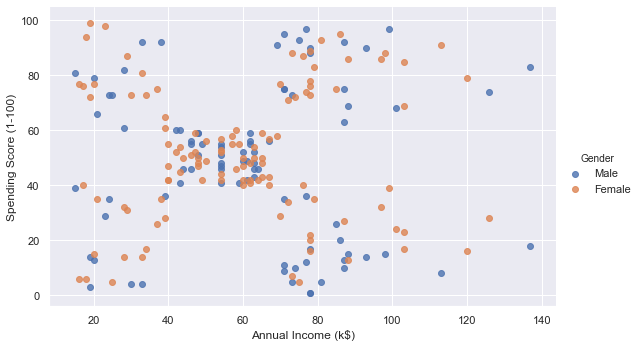

In [206]:
sns.set()
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', fit_reg=False,
          aspect=1.6);
# no, gender doesn't play an important role in spending score

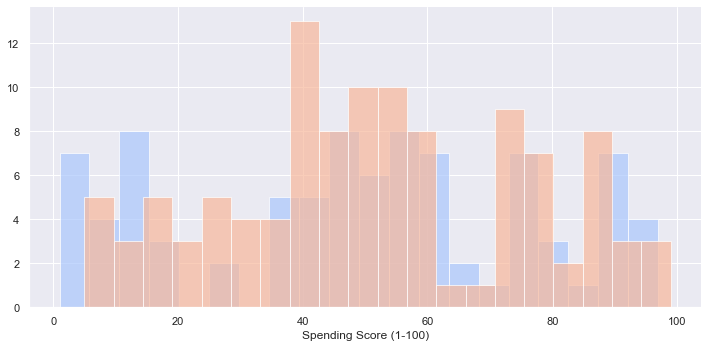

In [207]:
g = sns.FacetGrid(df, hue='Gender', size=5, aspect=2, palette='coolwarm')
g.map(plt.hist, 'Spending Score (1-100)', bins=20, alpha=0.7);

In [208]:
# one hot encoding

In [209]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender], axis=1)
df.drop('Gender', axis=1, inplace=True)
df.head(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1


In [210]:
# handle outliers

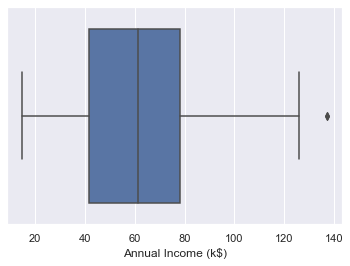

In [211]:
sns.boxplot(x='Annual Income (k$)', data=df);

In [212]:
def outlier(df, col):
    q3 = df[col].describe()['75%']
    q1 = df[col].describe()['25%']
    iqr = q3-q1
    maxx = q3 + (1.5*iqr)
    minn = q1 - (1.5*iqr)
    df[col] = df[col].apply(lambda x: q3 if x>=maxx else q1 if x<=minn else x)

In [213]:
outlier(df, 'Annual Income (k$)')

In [214]:
# use only columns Annual Income (k$) & Spending Score (1-100) for our algo

In [215]:
data = df.iloc[ : , [2,3]].values # creating an array
# data = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [216]:
# plot the elbow method and find k

In [217]:
from sklearn.cluster import KMeans

dist = [] 
K = range(1,11)

for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    dist.append(kmeans.inertia_)

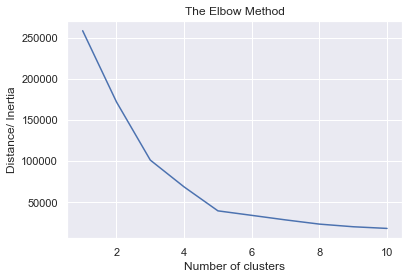

In [218]:
sns.set()
plt.plot(K, dist)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Distance/ Inertia");

In [219]:
# fitting kmeans to dataset

In [220]:
kmeans = KMeans(n_clusters=5, random_state=42)
# kmeans.fit(df)
# kmeans.predict(df) 

# combining the fit and predict steps from above into a single step
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [221]:
# put the y_kmeans array values to original dataset

In [222]:
df['Result'] = y_kmeans
df.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Result
0,1,19,15.0,39,1,3
1,2,21,15.0,81,1,1
2,3,20,16.0,6,0,3


In [156]:
# segregate data based on customers

In [157]:
gr = df.groupby('Result')

In [223]:
gr_0 = gr.get_group(0).index
gr_1 = gr.get_group(1).index
gr_2 = gr.get_group(2).index
gr_3 = gr.get_group(3).index
gr_4 = gr.get_group(4).index

# or
# cl_0 = df[df['Result'] == 0].index          => same for other groups

display (
    gr.get_group(0).head(), # suppose we want to find the details of customers in cluster 0
    
    gr_0
)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Result,Result_new
43,44,31,39.0,61,0,0,3
46,47,50,40.0,55,0,0,3
47,48,27,40.0,47,0,0,3
48,49,29,40.0,42,0,0,3
49,50,31,40.0,42,0,0,3


Int64Index([ 43,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
             58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
             71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
             84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
             97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
            110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
            126, 142],
           dtype='int64')

In [224]:
# plot the clusters

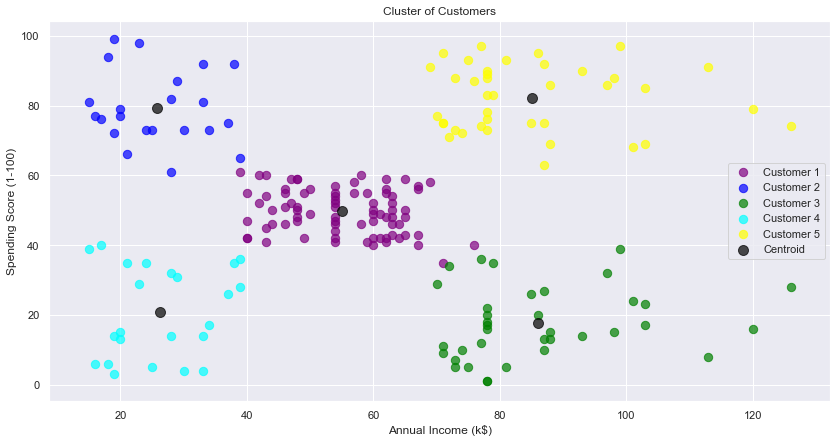

In [225]:
plt.figure(figsize= (14,7))
plt.scatter(data[gr_0, 0], data[gr_0, 1], s = 70, c = 'purple', label = 'Customer 1', alpha=0.7)
plt.scatter(data[gr_1, 0], data[gr_1, 1], s = 70, c = 'blue', label = 'Customer 2', alpha=0.7)
plt.scatter(data[gr_2, 0], data[gr_2, 1], s = 70, c = 'green', label = 'Customer 3', alpha=0.7)
plt.scatter(data[gr_3, 0], data[gr_3, 1], s = 70, c = 'cyan', label = 'Customer 4', alpha=0.7)
plt.scatter(data[gr_4, 0], data[gr_4, 1], s = 70, c = 'yellow', label = 'Customer 5', alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7, label = 'Centroid');

plt.title("Cluster of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

In [226]:
# easier way to plot the above graph

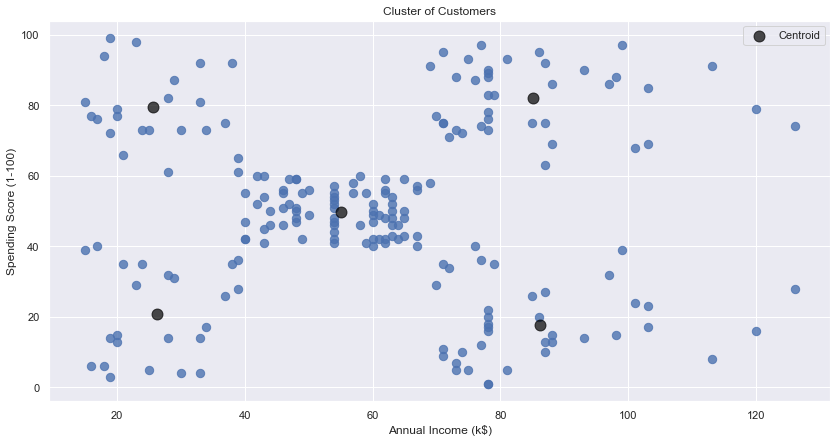

In [227]:
plt.figure(figsize= (14,7))
plt.scatter(data[:, 0], data[:, 1], s=70, cmap='viridis', alpha=0.8)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=120, alpha=0.7, label = 'Centroid');

plt.title("Cluster of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

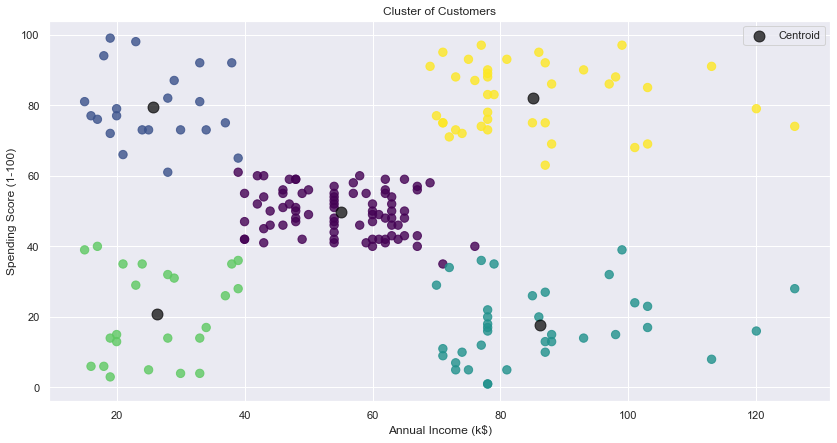

In [228]:
# with clusters
plt.figure(figsize= (14,7))
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=70, cmap='viridis', alpha=0.8)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=120, alpha=0.7, label = 'Centroid');

plt.title("Cluster of Customers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

In [229]:
# data analysing

In [ ]:
'''
if you were a bank, who would you target for loan purpose?
=> probably the group with high income & high score  # left top
=> purple group or Customer 3 (top right)

if you were a bank which customers would you target to increase your revenue? 
=> probably the group with high income who spends less
=> yellow group or Customer 5 (bottom right)

if you're an e-commerce website which customers are ideal for you? 
=> e-commerce websites wont care about income, they are concerned about the score/points
=> purple and dark green (top half) 
'''

In [166]:
# apply kmeans on three columns Annual Income (k$) & Spending Score (1-100) $ Age 

In [231]:
data_new = df[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].values

In [232]:
# plot a new elbow method and find k

In [233]:
from sklearn.cluster import KMeans

dist_new = []
K = range(1,11)

for i in K:
    kmeans_new = KMeans(n_clusters=i)
    kmeans_new.fit(data_new)
    dist_new.append(kmeans_new.inertia_)

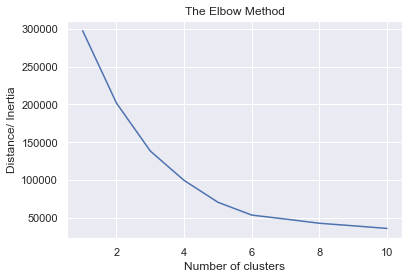

In [234]:
sns.set()
plt.plot(K, dist_new)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Distance/ Inertia");

In [235]:
# fitting kmeans to dataset

In [236]:
kmeans_new = KMeans(n_clusters=5, random_state=42)

y_kmeans_new = kmeans_new.fit_predict(data_new)
y_kmeans_new

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [237]:
# put the y_kmeans_new array values to original dataset

In [238]:
df['Result_new'] = y_kmeans_new
df.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Result,Result_new
0,1,19,15.0,39,1,3,0
1,2,21,15.0,81,1,1,4
2,3,20,16.0,6,0,3,0


In [239]:
df['Result_new'].unique()

array([0, 4, 3, 1, 2])

In [240]:
# segregate the new data based on customers

In [241]:
gr_new = df.groupby('Result_new')

In [242]:
gr_0_new = gr_new.get_group(0).index
gr_1_new = gr_new.get_group(1).index
gr_2_new = gr_new.get_group(2).index
gr_3_new = gr_new.get_group(3).index
gr_4_new = gr_new.get_group(4).index

display (
    gr_new.get_group(0).head(),
    
    gr_0_new
)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Result,Result_new
0,1,19,15.0,39,1,3,0
2,3,20,16.0,6,0,3,0
4,5,31,17.0,40,0,3,0
6,7,35,18.0,6,0,3,0
8,9,64,19.0,3,1,3,0


Int64Index([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
            34, 36, 38, 40, 42, 44],
           dtype='int64')

In [243]:
df['Result_new'].value_counts()

3    78
1    39
2    38
0    23
4    22
Name: Result_new, dtype: int64

In [244]:
# plot the clusters

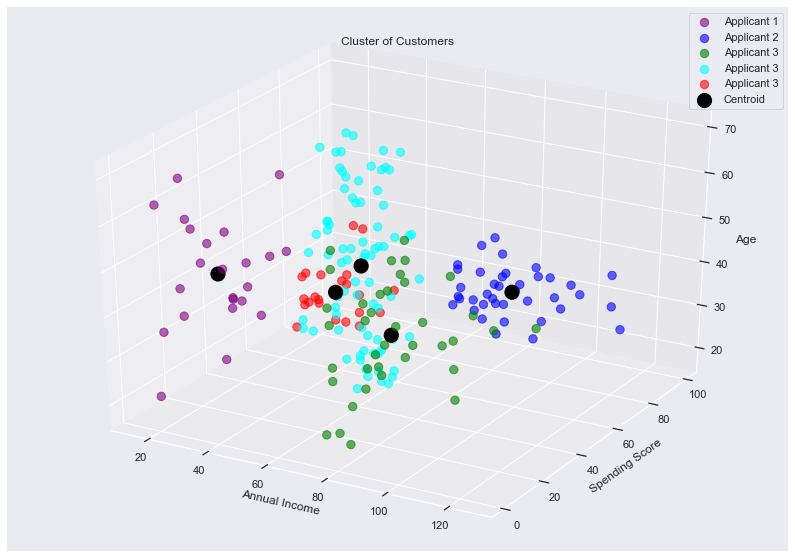

In [245]:
sns.set()
fig = plt.figure(figsize= (14,10))
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(data_new[gr_0_new, 0], data_new[gr_0_new, 1], data_new[gr_0_new, 2], 
             s = 70, c = 'purple', label = 'Applicant 1', alpha=0.6)
ax.scatter3D(data_new[gr_1_new, 0], data_new[gr_1_new, 1], data_new[gr_1_new, 2], 
             s = 70, c = 'blue', label = 'Applicant 2', alpha=0.6)
ax.scatter3D(data_new[gr_2_new, 0], data_new[gr_2_new, 1], data_new[gr_2_new, 2], 
             s = 70, c = 'green', label = 'Applicant 3', alpha=0.6)
ax.scatter3D(data_new[gr_3_new, 0], data_new[gr_3_new, 1], data_new[gr_3_new, 2], 
             s = 70, c = 'cyan', label = 'Applicant 3', alpha=0.6)
ax.scatter3D(data_new[gr_4_new, 0], data_new[gr_4_new, 1], data_new[gr_4_new, 2], 
             s = 70, c = 'red', label = 'Applicant 3', alpha=0.6)

centers = kmeans_new.cluster_centers_
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], 
             c='black', s=200, alpha=1, label = 'Centroid');

plt.legend()
ax.set_title("Cluster of Customers")
ax.set_xlabel('Annual Income'); ax.set_ylabel('Spending Score'); ax.set_zlabel('Age');

In [246]:
# easier way to plot the above graph

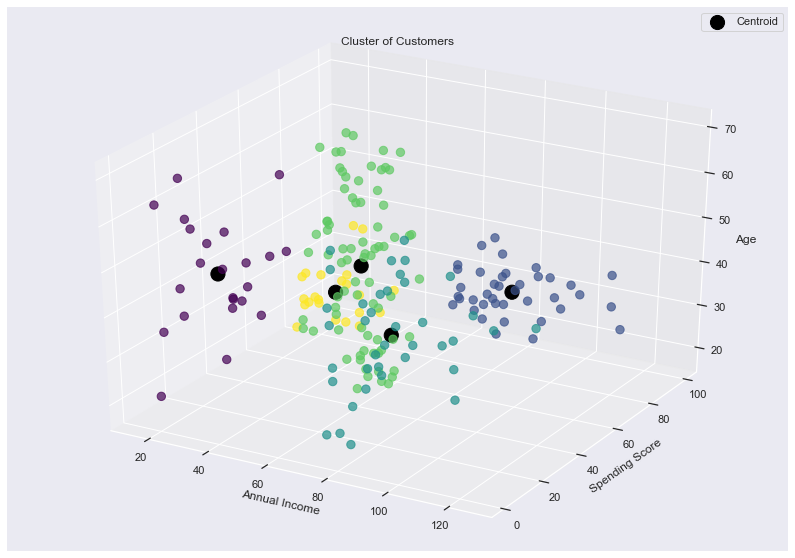

In [247]:
fig = plt.figure(figsize= (14,10))
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(data_new[:, 0], data_new[:, 1], data_new[:, 2], c=y_kmeans_new, 
             s=70, cmap='viridis', alpha=0.7)

centers = kmeans_new.cluster_centers_
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], 
             c='black', s=200, alpha=1, label = 'Centroid');

plt.legend()
ax.set_title("Cluster of Customers")
ax.set_xlabel('Annual Income'); ax.set_ylabel('Spending Score'); ax.set_zlabel('Age');